In [139]:
#import required libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import openpyxl as xl

import seaborn as sns

In [140]:
pip install xlrd


In [141]:
Assignment2= pd.read_excel("Assignment2.xls")

In [142]:
pip install datetime


In [143]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [144]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import joblib

In [145]:
print(Assignment2.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [146]:
#So now, any repeated data is being eliminated
Assignment2.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [147]:
#I start with defining the continuous and categorical data.
#Object is the categorical data in layman language.
#So when I exclude and include it, I am selecting out or selecting in only categorical data.
#When categorical data is selected out, you are left with the continuous data
 
cont_data = Assignment2.select_dtypes(exclude=object)
cat_data = Assignment2.select_dtypes(include=object)

#After defining the continuous and categorical data. I am looking to sepcify them.
#The continous data:



In [148]:
cont_data.dtypes


Row ID                  int64
Order Date     datetime64[ns]
Ship Date      datetime64[ns]
Postal Code             int64
Sales                 float64
Quantity                int64
Discount              float64
Profit                float64
dtype: object

In [149]:
cat_data.dtypes

Order ID         object
Ship Mode        object
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
dtype: object

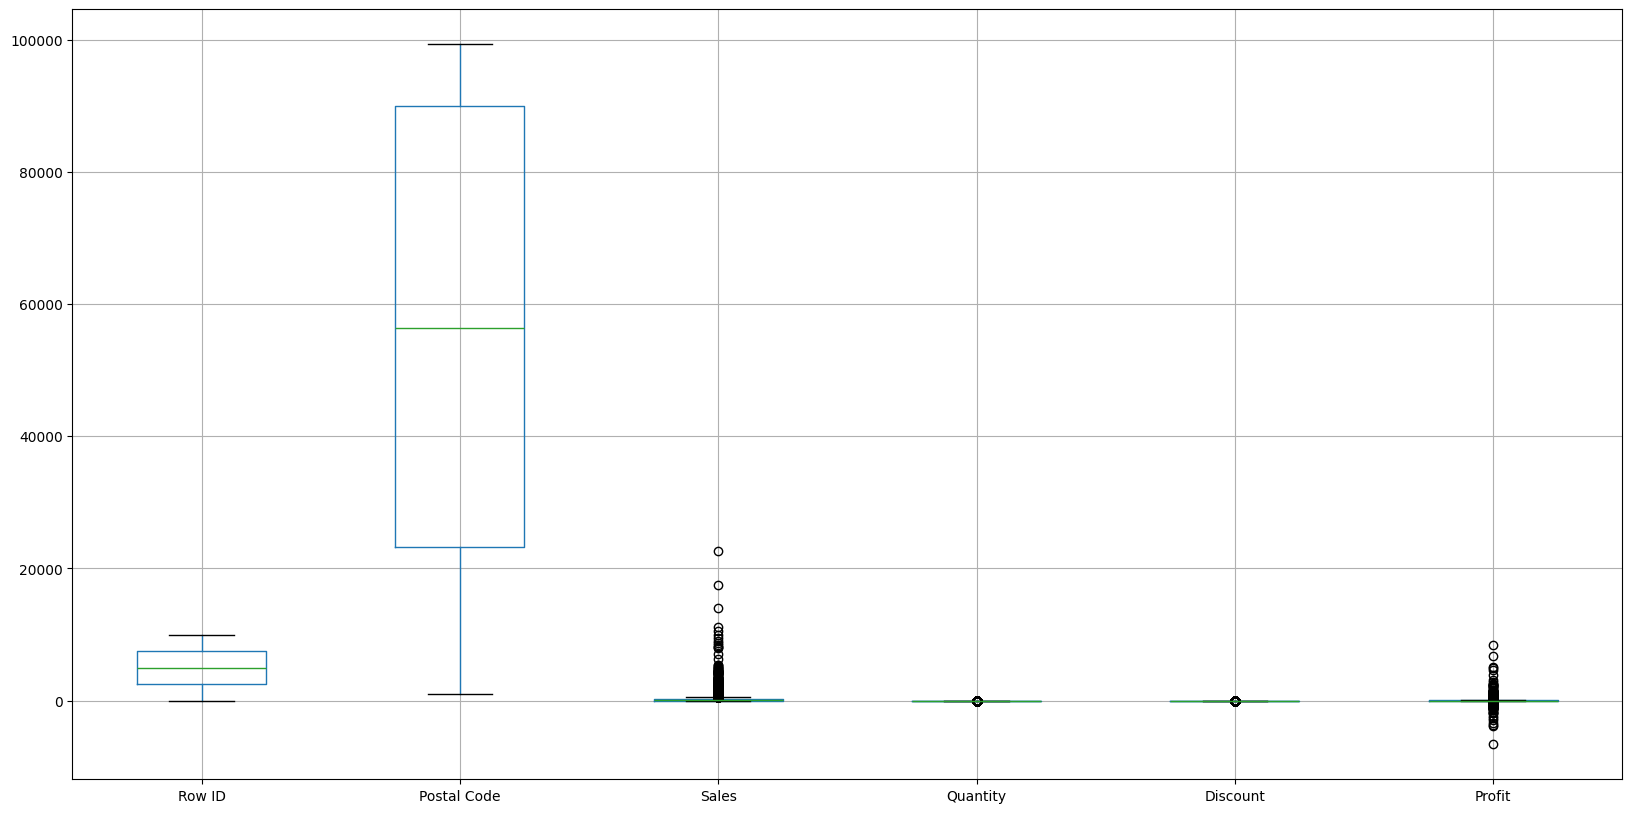

In [150]:
import matplotlib.pyplot as plt
cont_data.boxplot(figsize=(20,10))
plt.show()

In [151]:
def remove_outliers(Assignment2):
    for i in Assignment2.columns:
        q1 = Assignment2[i]. quantile(0.25)
        q3 = Assignment2[i]. quantile(0.75) 
        IQR_Assignment2 = q3 - q1
        ub = q3 + 1.5*IQR_Assignment2
        lb = q1 - 1.5*IQR_Assignment2
        #where ub is upper boundary and lb is lower boundary
        Assignment2[i] = np.where(Assignment2[i]> ub, ub, Assignment2[i])
        Assignment2[i] = np.where(Assignment2[i]<lb,lb,Assignment2[i]) 
        

In [220]:
remove_outliers(cont_data)


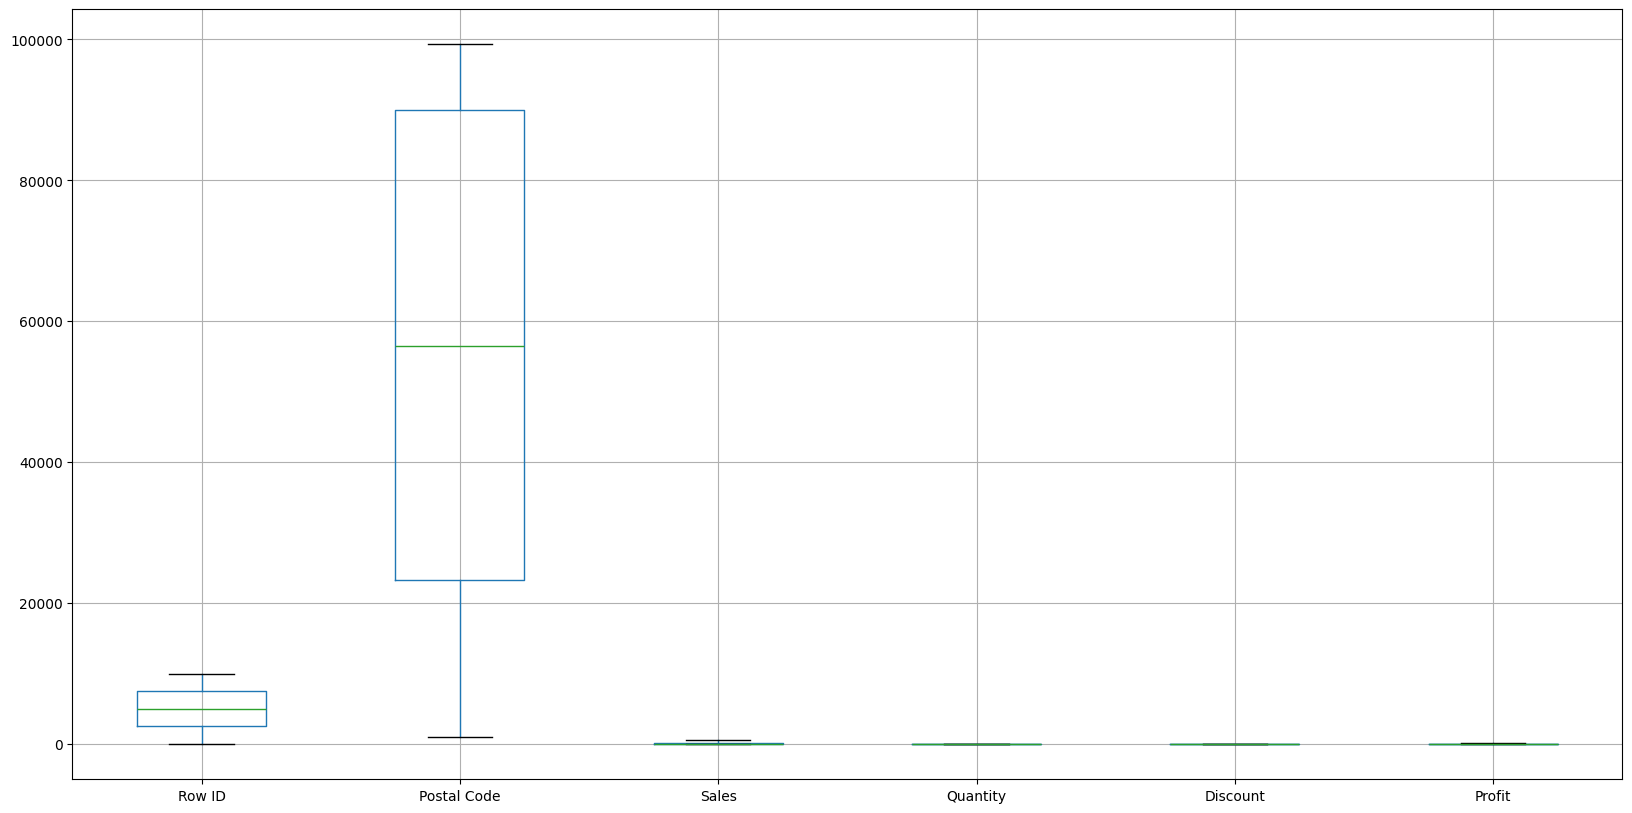

In [ ]:
cont_data.boxplot(figsize=(20,10))
plt.show()

In [ ]:
Assignment2['Order Date'] = pd.to_datetime(Assignment2['Order Date'])
Assignment2['Ship Date'] = pd.to_datetime(Assignment2['Ship Date'])

In [ ]:
print(Assignment2.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

Number 1


In [ ]:
Assignment2['Delivery Time'] = (Assignment2['Ship Date'] - Assignment2['Order Date']).dt.days

In [ ]:
average_delivery_time = Assignment2.groupby('Ship Mode')['Delivery Time'].mean()
fastest_shipping_mode = average_delivery_time.idxmin()
print(f"The fastest shipping mode on average is: {fastest_shipping_mode}")

The fastest shipping mode on average is: Same Day


Number 2

In [ ]:
#Continuous data is as follows:
cont_data = Assignment2.select_dtypes(exclude= object)
cont_data.dtypes

Row ID                    int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Postal Code               int64
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Delivery Time             int64
dtype: object

In [ ]:

#Categorical data is as follows:
cat_data = Assignment2.select_dtypes(include = object)
cat_data.dtypes
cat_data.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

In [ ]:


Assignment2.drop(columns= ['Order ID', 'Customer Name'], axis = True)

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


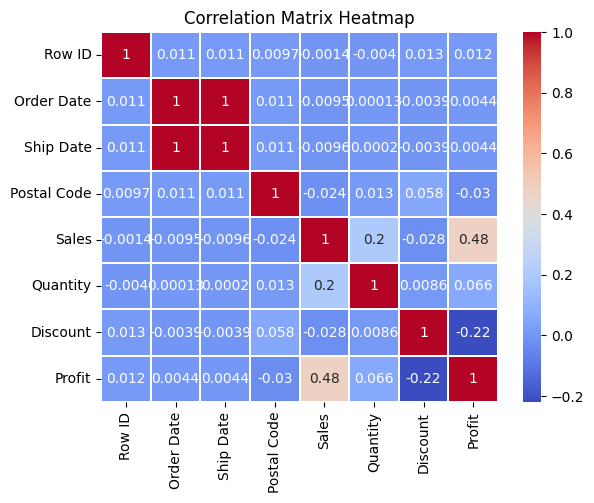

In [ ]:
sns.heatmap(cont_data.corr(), annot=True, cmap="coolwarm", linewidths= .2)
plt.title("Correlation Matrix Heatmap")

plt.show()

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
FunctionAnova(Assignment2,  'Sales' , ['Profit'] )


##### ANOVA Results ##### 

Profit is correlated with Sales | P-Value: 0.0


['Profit']

In [ ]:
FunctionAnova(Assignment2, 'Row ID', ['Profit'])

##### ANOVA Results ##### 

Profit is NOT correlated with Row ID | P-Value: 0.343251065672815


[]

In [ ]:
FunctionAnova(Assignment2, 'Postal Code', ['Profit'])

##### ANOVA Results ##### 

Profit is NOT correlated with Postal Code | P-Value: 0.06754005101454724


[]

In [ ]:
FunctionAnova(Assignment2, 'Quantity', ['Profit'])

##### ANOVA Results ##### 

Profit is correlated with Quantity | P-Value: 0.0


['Profit']

In [ ]:
FunctionAnova(Assignment2, 'Discount', ['Profit'])

##### ANOVA Results ##### 

Profit is correlated with Discount | P-Value: 0.0


['Profit']

So Profit is correlated with Quantity, Discount and Sales. We drop the variables that profit is not correlated with.

In [ ]:
Assignment2 = Assignment2.drop(columns= ['Row ID', 'Order Date', 'Ship Date', 'Postal Code'], axis = True)

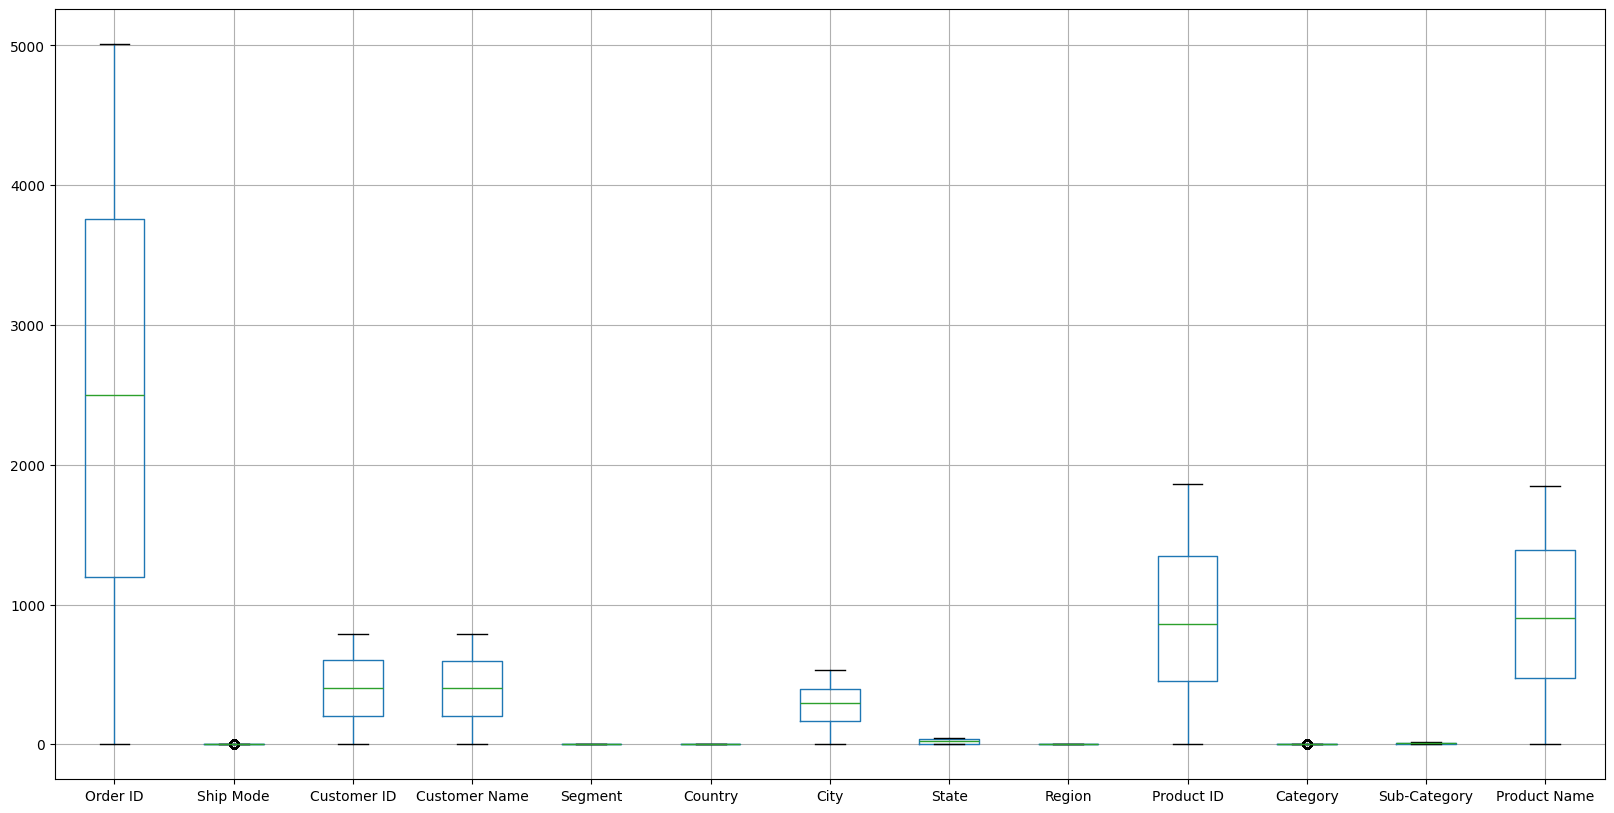

In [ ]:
#encode categorical data
# Create DataFrame
cat_data = Assignment2.select_dtypes(include = object)

# Initialize LabelEncoder
label_encoders = {}

# Label encode each categorical column
for column in df.columns:
    le = LabelEncoder()
    cat_data[column] = le.fit_transform(cat_data[column])
    label_encoders[column] = le

cat_data.boxplot(figsize=(20,10))
plt.show()

In [ ]:
remove_outliers(cat_data)

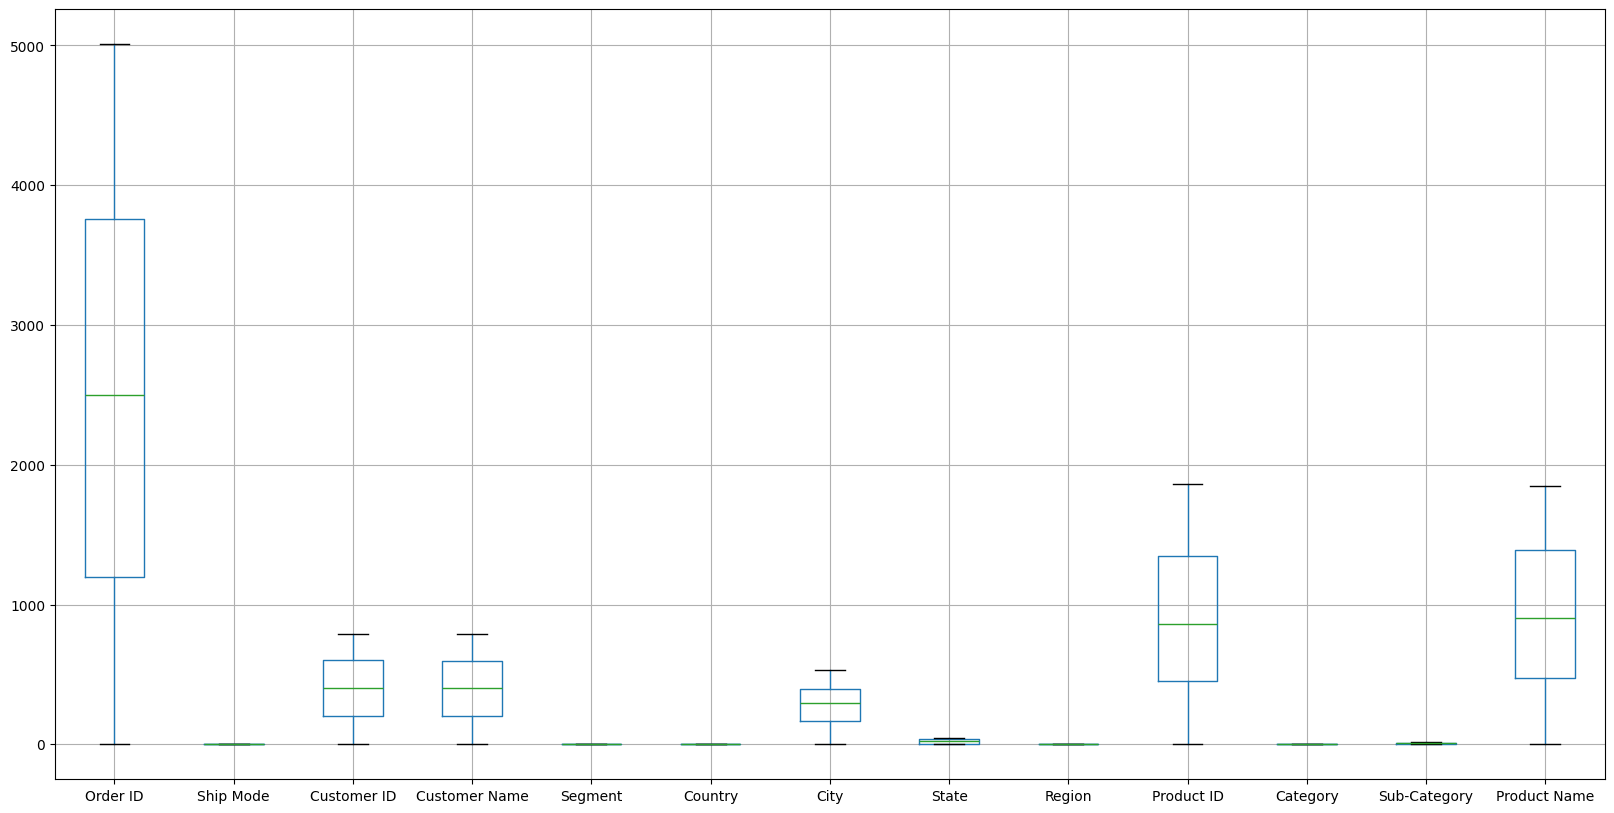

In [ ]:
cat_data.boxplot(figsize=(20,10))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_data = Assignment2.select_dtypes(include = object)

# Initialize LabelEncoder
label_encoders = {}

# Label encode each categorical column
for column in df.columns:
    le = LabelEncoder()
    cat_data[column] = le.fit_transform(cat_data[column])
    label_encoders[column] = le



In [ ]:
# Visualising categorical variable

def PlotBarCharts(inpData, colsToPlot=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    # If colsToPlot is not specified, use all columns except object type (assuming you want to plot only numeric columns)
    if colsToPlot is None: 
        colsToPlot = inpData.select_dtypes(include=np.number).columns.tolist()
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


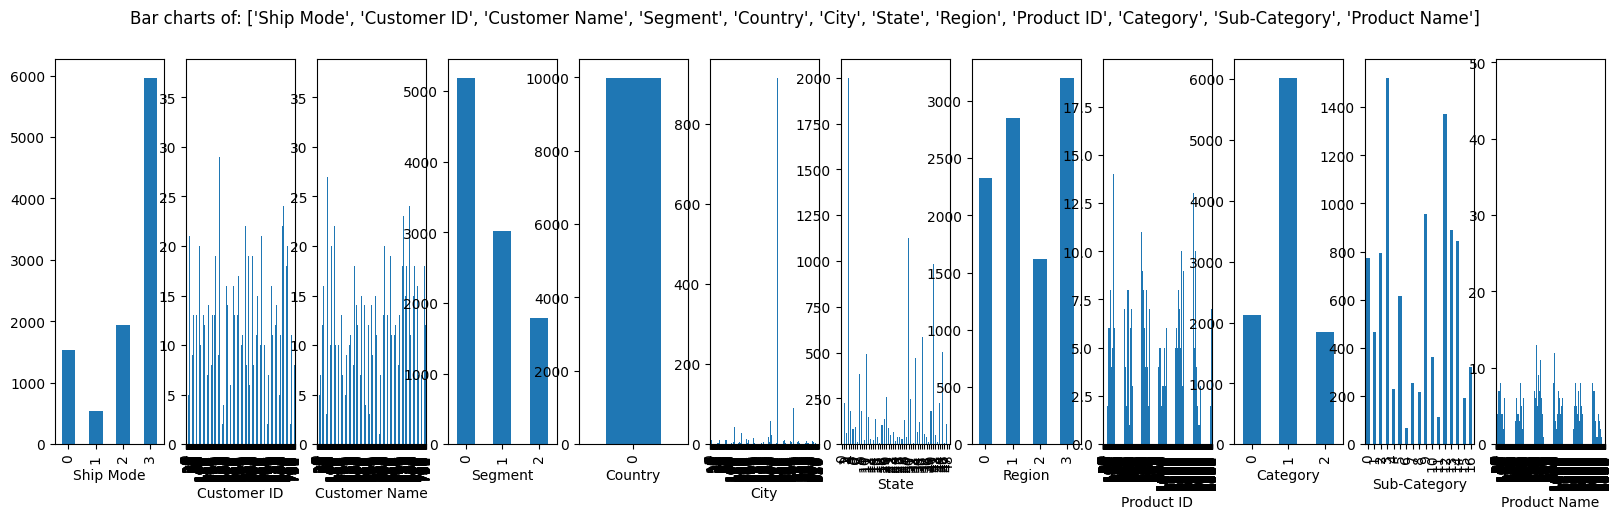

In [ ]:
PlotBarCharts(cat_data,colsToPlot=(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name']))

In [ ]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
FunctionAnova(Assignment2, 'Profit', ['Ship Mode', 'Customer ID',  'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category'])

##### ANOVA Results ##### 

Ship Mode is NOT correlated with Profit | P-Value: 0.9272083739374918
Customer ID is correlated with Profit | P-Value: 0.004670864657922327
City is NOT correlated with Profit | P-Value: 0.2584548708110118
State is correlated with Profit | P-Value: 3.2051254723417724e-60
Region is correlated with Profit | P-Value: 0.04889160022168425
Product ID is correlated with Profit | P-Value: 0.0
Category is correlated with Profit | P-Value: 3.46991834622419e-24
Sub-Category is correlated with Profit | P-Value: 2.814720542674169e-181


['Customer ID', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category']

In [209]:
# Specify the columns to keep
columns_to_keep = ['Discount', 'Sales', 'Quantity', 'Profit', 'Customer ID', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category']

# Use the loc accessor to select only those columns
Assignment2 = Assignment2.loc[:, columns_to_keep]

In [198]:
SelectedColumns = ['State', 'Region', 'Category', 'Sub-Category',  'Discount', 'Sales','Quantity', 'Profit']
DataforMI = Assignment2[SelectedColumns]

# Split the dataset into features and target
X = DataforMI.drop(columns='Profit')
y = DataforMI['Profit']

# Initialize label encoders for categorical variables
le_state = LabelEncoder()
le_region = LabelEncoder()
le_category = LabelEncoder()
le_subcategory = LabelEncoder()

# Encode categorical variables
X['State'] = le_state.fit_transform(X['State'])
X['Region'] = le_region.fit_transform(X['Region'])
X['Category'] = le_category.fit_transform(X['Category'])
X['Sub-Category'] = le_subcategory.fit_transform(X['Sub-Category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

# Initialize standard scaler and apply it to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [199]:
# Importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import joblib  

import os  # Importing os module for handling file and directory operations

# Initializing the linear regression model
lr = LinearRegression()

# Training the model on the training data
lr.fit(X_train, y_train)

# Saving the model to a folder (create the folder if it doesn't exist)
model_folder = "models"
os.makedirs(model_folder, exist_ok=True)  # Creates the folder if it doesn't exist
model_path = os.path.join(model_folder, "ProfitPredictionModel.pkl")
joblib.dump(lr, model_path)

# Making predictions on the test data
y_pred = lr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_var)


Mean Squared Error: 48731.36087998197
Mean Absolute Error: 62.05339889941139
R-squared Score: 0.17771220182591008
Explained Variance Score: 0.17781602579347333


In [200]:
# Combine training and testing data for encoding
combined_data = pd.concat([X_train, X_test], axis=0)

# Initialize label encoders for categorical variables
le_state = LabelEncoder()
le_region = LabelEncoder()
le_category = LabelEncoder()
le_subcategory = LabelEncoder()

# Fit label encoders on combined data
combined_data['State'] = le_state.fit_transform(combined_data['State'])
combined_data['Region'] = le_region.fit_transform(combined_data['Region'])
combined_data['Category'] = le_category.fit_transform(combined_data['Category'])
combined_data['Sub-Category'] = le_subcategory.fit_transform(combined_data['Sub-Category'])


# Transform training and testing data separately
X_train['State'] = le_state.transform(X_train['State'])
X_train['Region'] = le_region.transform(X_train['Region'])
X_train['Category'] = le_category.transform(X_train['Category'])
X_train['Sub-Category'] = le_subcategory.transform(X_train['Sub-Category'])

X_test['State'] = le_state.transform(X_test['State'])
X_test['Region'] = le_region.transform(X_test['Region'])
X_test['Category'] = le_category.transform(X_test['Category'])
X_test['Sub-Category'] = le_subcategory.transform(X_test['Sub-Category'])


# Scale numerical variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions using the trained Random Forest Regressor model
predictions = lr.predict(X_test_scaled)

# Print the predicted profits
print('Predicted Profits:')
for profit in predictions:
    print(profit)


Predicted Profits:
214.14804153756864
215.86309759867333
212.00603323981625
-20.095982437992973
213.9188176602113
-133.887629374112
-472.5331318245289
-22.030392434377454
215.86179015732262
211.9943300452864
214.03184578782282
208.08636051058625
196.46447485026152
-14.242784804111338
-12.308919043476102
-20.09902959127654
210.33877142364423
-18.023875127925407
211.96994573261486
-27.877424897662095
-14.216037884684567
209.31673722886535
-16.048227935290328
210.10066828334658
204.18860602578906
211.97551564536116
-594.4221256246675
211.97307083633126
210.03873312125722
-20.08888186220195
-598.3236993263534
213.95142220034546
204.1980557441696
-12.280329659273221
-14.250143324971013
208.15451399129495
208.1705115460337
215.87351461106135
-12.311025122443255
-27.848061678253245
213.93098501413658
202.23973055499118
208.08246298894449
213.91832161200233
204.18922608605027
206.20870693298963
200.68447642440083
212.0591706325996
-14.26101670171127
-354.55653585231596
214.02051462944974
211.9

c:\Users\EK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 49014.354500734924


In [204]:
# Combine training and testing data for encoding
combined_data = pd.concat([X_train, X_test], axis=0)

# Initialize label encoders for categorical variables
le_state = LabelEncoder()
le_region = LabelEncoder()
le_category = LabelEncoder()
le_subcategory = LabelEncoder()


# Fit label encoders on combined data
combined_data['State'] = le_state.fit_transform(combined_data['State'])
combined_data['Region'] = le_region.fit_transform(combined_data['Region'])
combined_data['Category'] = le_category.fit_transform(combined_data['Category'])
combined_data['Sub-Category'] = le_subcategory.fit_transform(combined_data['Sub-Category'])


# Transform training and testing data separately
X_train['State'] = le_state.transform(X_train['State'])
X_train['Region'] = le_region.transform(X_train['Region'])
X_train['Category'] = le_category.transform(X_train['Category'])
X_train['Sub-Category'] = le_subcategory.transform(X_train['Sub-Category'])


X_test['State'] = le_state.transform(X_test['State'])
X_test['Region'] = le_region.transform(X_test['Region'])
X_test['Category'] = le_category.transform(X_test['Category'])
X_test['Sub-Category'] = le_subcategory.transform(X_test['Sub-Category'])


# Scale numerical variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions using the trained Random Forest Regressor model
predictions = rf_regressor.predict(X_test_scaled)

# Print the predicted profits
print('Predicted Profits:')
for profit in predictions:
    print(profit)


Predicted Profits:
197.82794099999992
2.0656340000000015
24.530153999999992
3.6547294166666635
6.198444908146667
-13.591011000000044
-81.85879500000013
8.4560923
1.499028
33.134208
78.93501773333337
15.276877925864147
69.153199
16.501034500000014
5.786562500000003
1.1184408952380946
228.55842199999978
48.50849266666663
2.3858621333333336
5.864039399999999
-2.91196286666667
1282.4457199999995
51.89462099999999
91.31863199999994
6.043817400000006
9.184710000000006
-31.03023800000005
6.957260437874254
22.81307999999998
11.05588900000001
-11.663103466666671
27.4657565
21.772799999999982
8.250177000000003
5.384910999999995
63.546104999999955
76.07935199999993
14.923032000000033
3.2329479999999995
10.963685999999994
14.136253000000002
4.359472999999997
8.44254457142857
5.6644000000000005
8.609708000000014
65.07989600000005
110.78324899999983
83.978203
1.065479000000001
-46.950488199999924
84.5548163999999
16.762893
142.5741549999999
-0.5056260000000027
-27.05623400000003
0.8713351619047622
1

In [221]:
# Save the model to a file

import pickle

with open('Kaija_Emmanuel_Assignment2_MSCS.pkl', 'wb') as f :
    pickle.dump(model, f)

In [224]:
import pickle
with open('Kaija_Emmanuel_Assignment2_MSCS', 'rb') as f:
    model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Kaija_Emmanuel_Assignment2_MSCS'